-- Задание 1
-- Вывести все уникальные бренды, у которых стандартная стоимость выше 1500 долларов.
select distinct brand from "transaction" t 
where 1=1
and t.standard_cost >= 1500

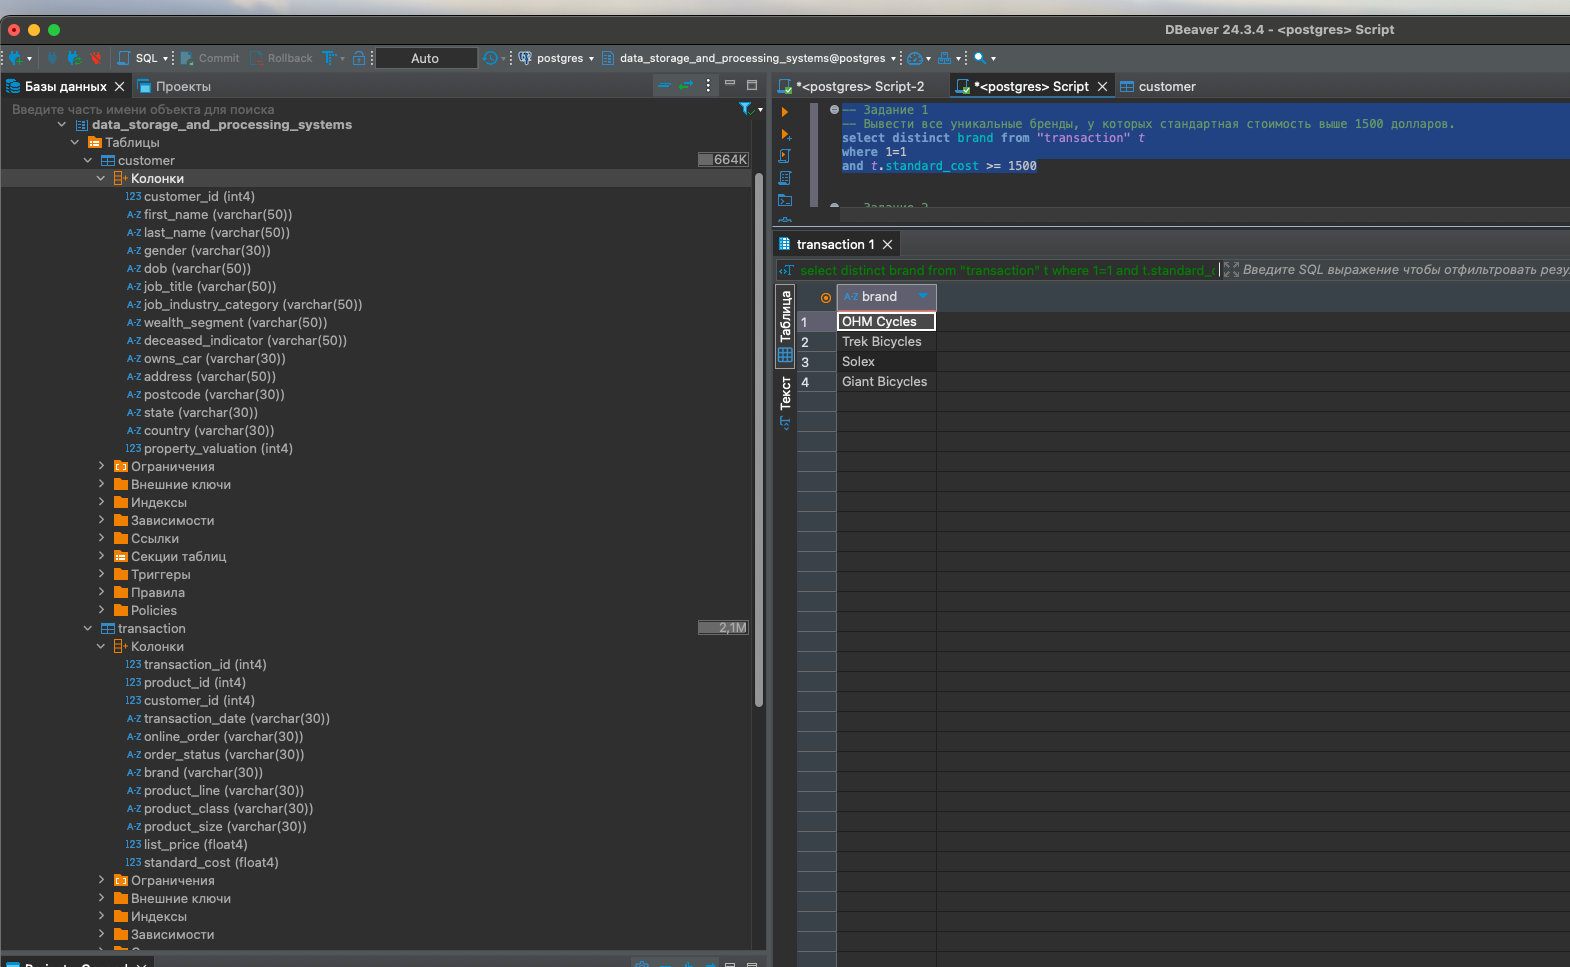

-- Задание 2
-- Вывести все подтвержденные транзакции за период '2017-04-01' по '2017-04-09' включительно.
select *
from "transaction" t 
where 1=1
and order_status = 'Approved'
and to_date(t.transaction_date, 'DD.MM.YYYY') between '2017-04-01' and '2027-04-09'

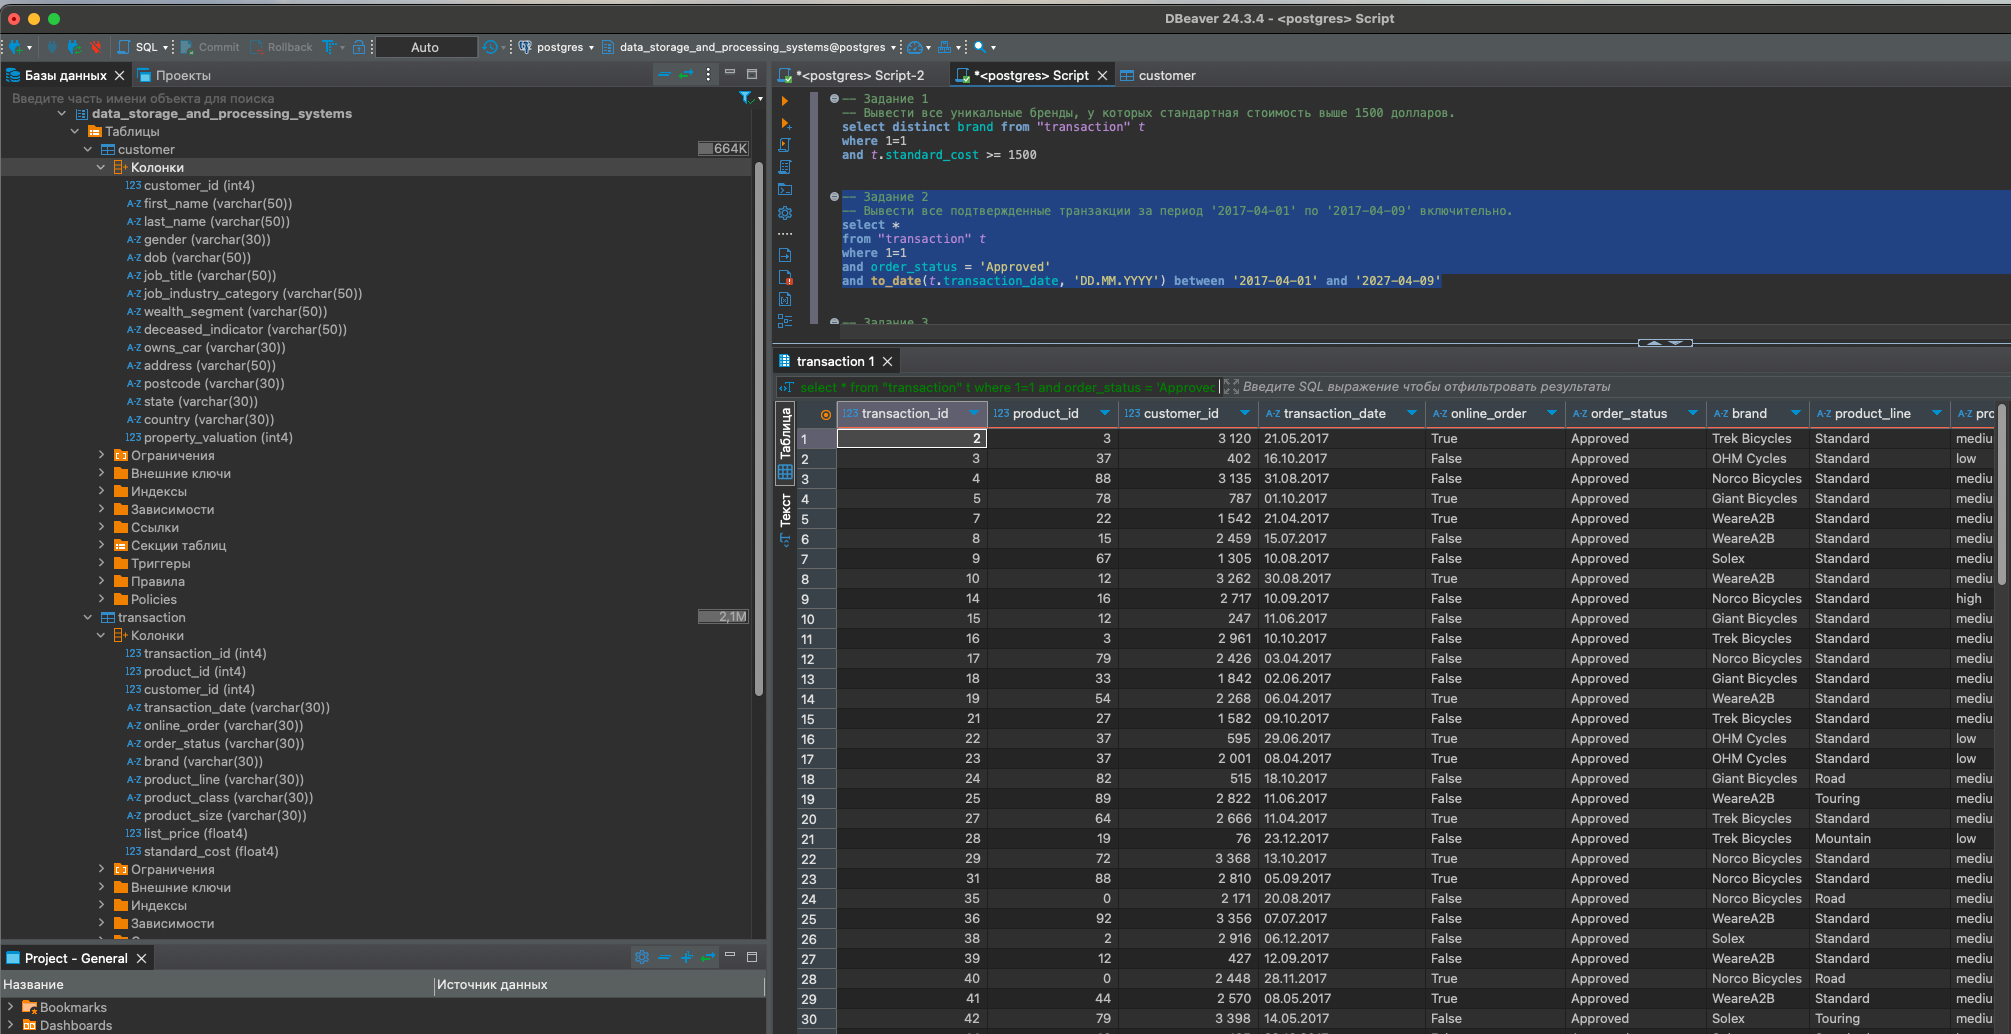

-- Задание 3
--Вывести все профессии у клиентов из сферы IT или Financial Services, которые начинаются с фразы 'Senior'.
select distinct job_title from customer
where 1=1
and job_industry_category in ('IT','Financial Services')
and job_title like 'Senior%'

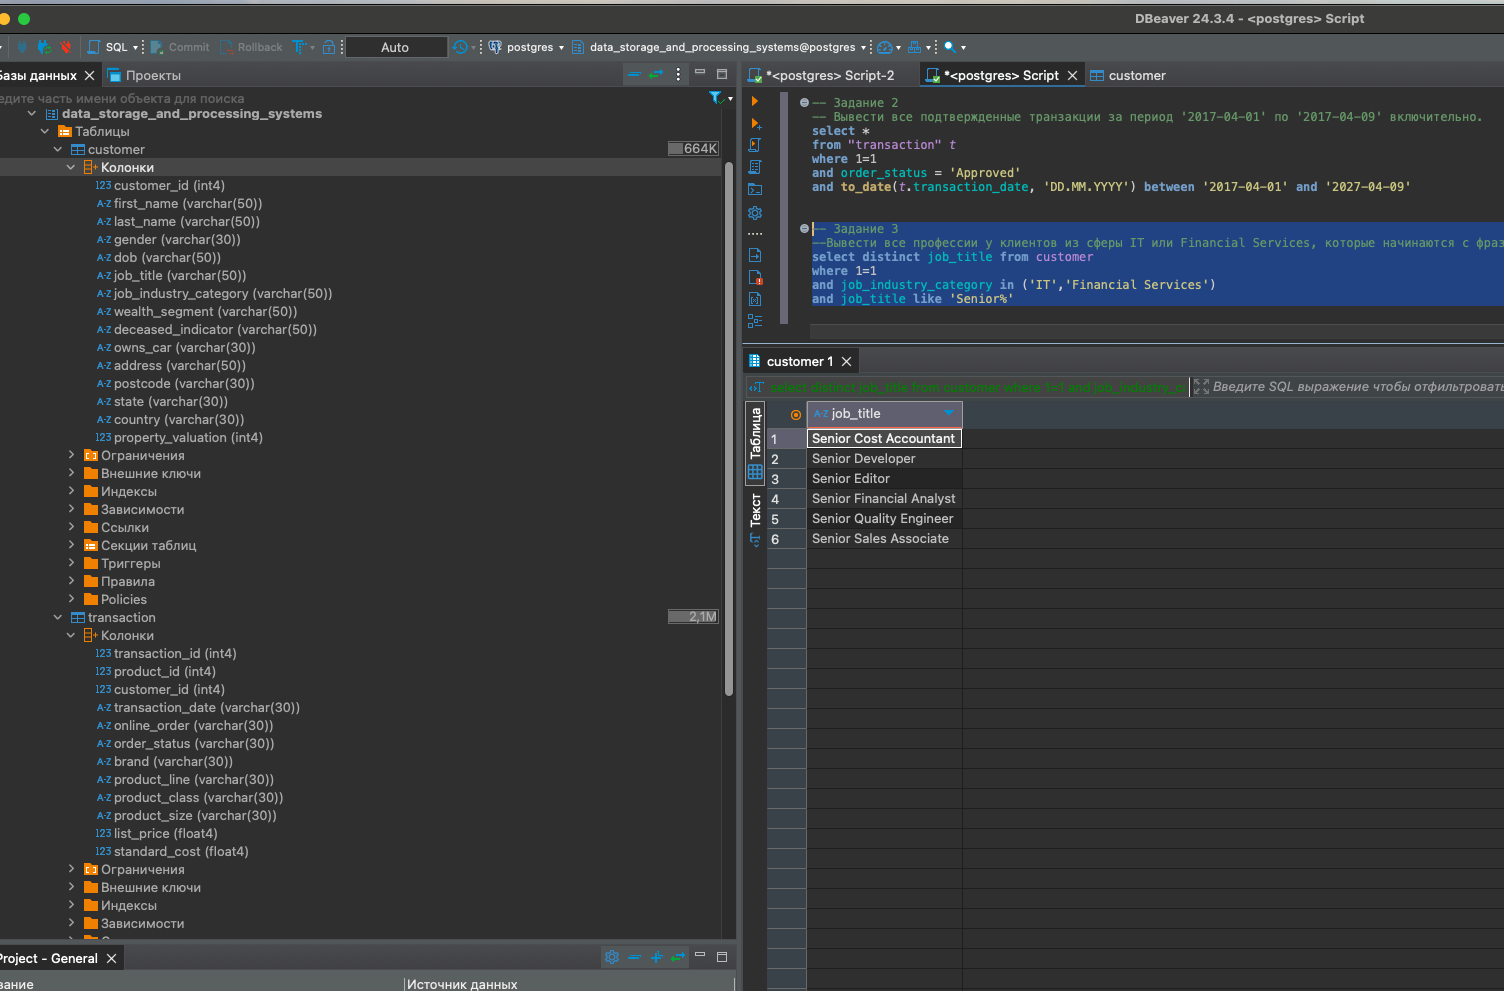

-- Задание 4
--Вывести все бренды, которые закупают клиенты, работающие в сфере Financial Services
with t1 as (
select customer_id from customer
where 1=1
and job_industry_category ='Financial Services'
)
select distinct t.brand 
from "transaction" t 
join t1
using(customer_id)
where 1=1

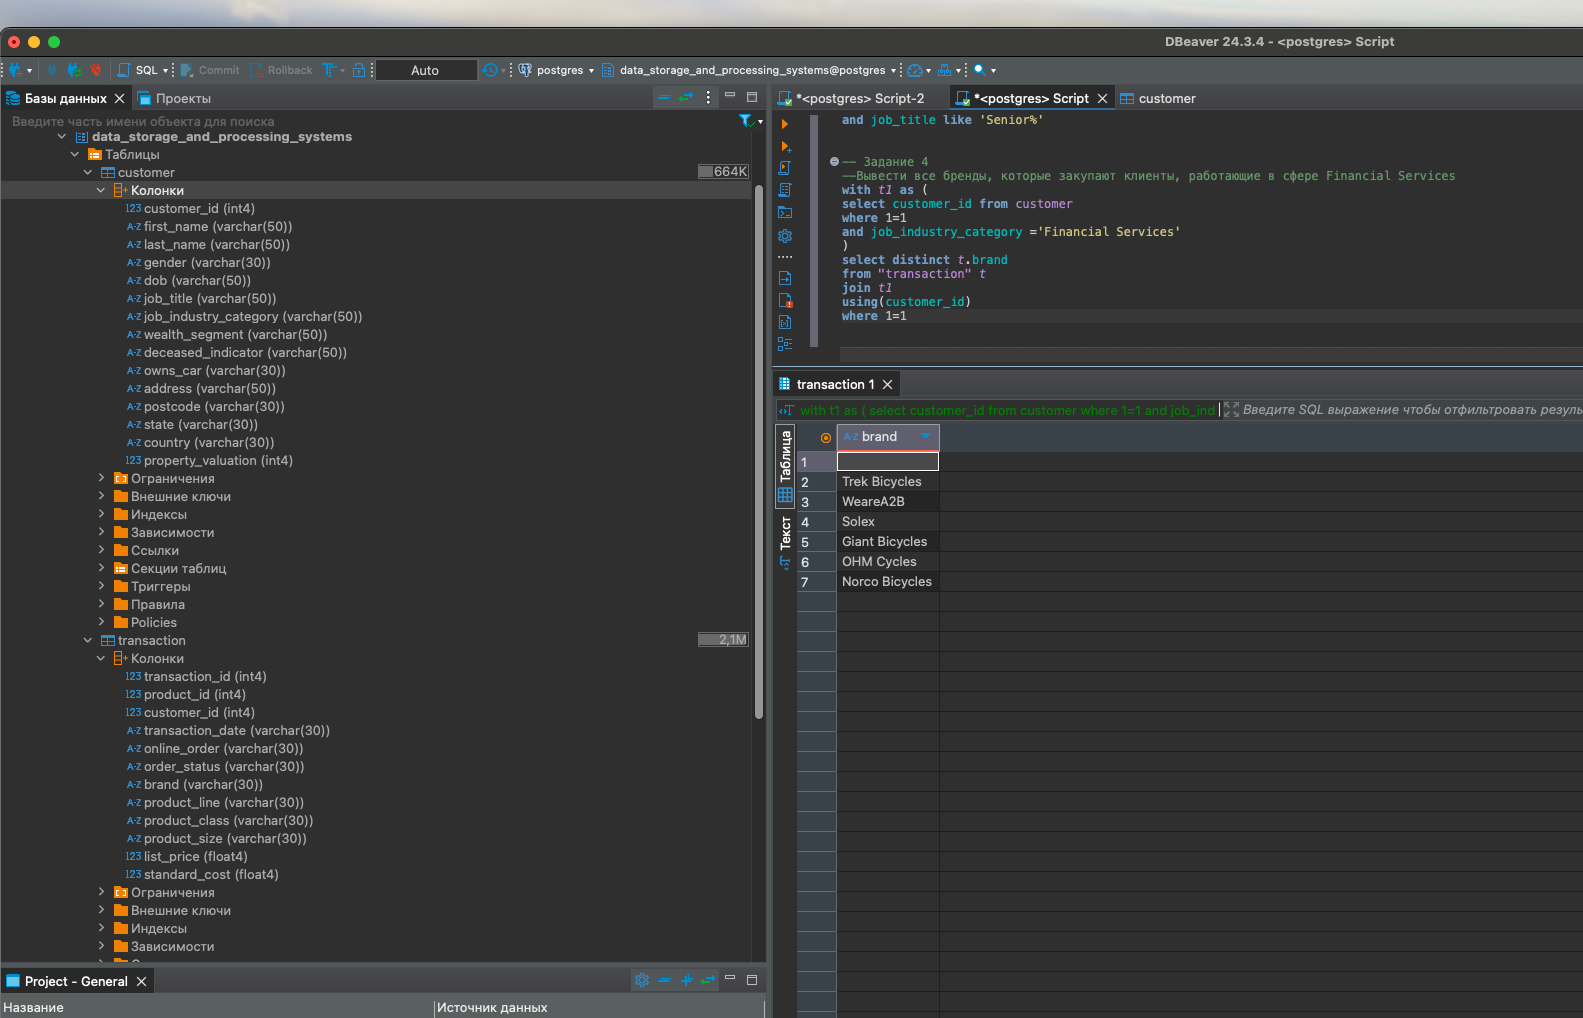

-- Задание 5
--Вывести 10 клиентов, которые оформили онлайн-заказ продукции из брендов 'Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles'.
with t1 as (
select customer_id,first_name,last_name
from customer
where 1=1
)
select customer_id,first_name,last_name
from "transaction" t 
join t1
using(customer_id)
where 1=1
and brand in ('Giant Bicycles','Norco Bicycles','Trek Bicycles')
and t.online_order = 'True'
limit 10

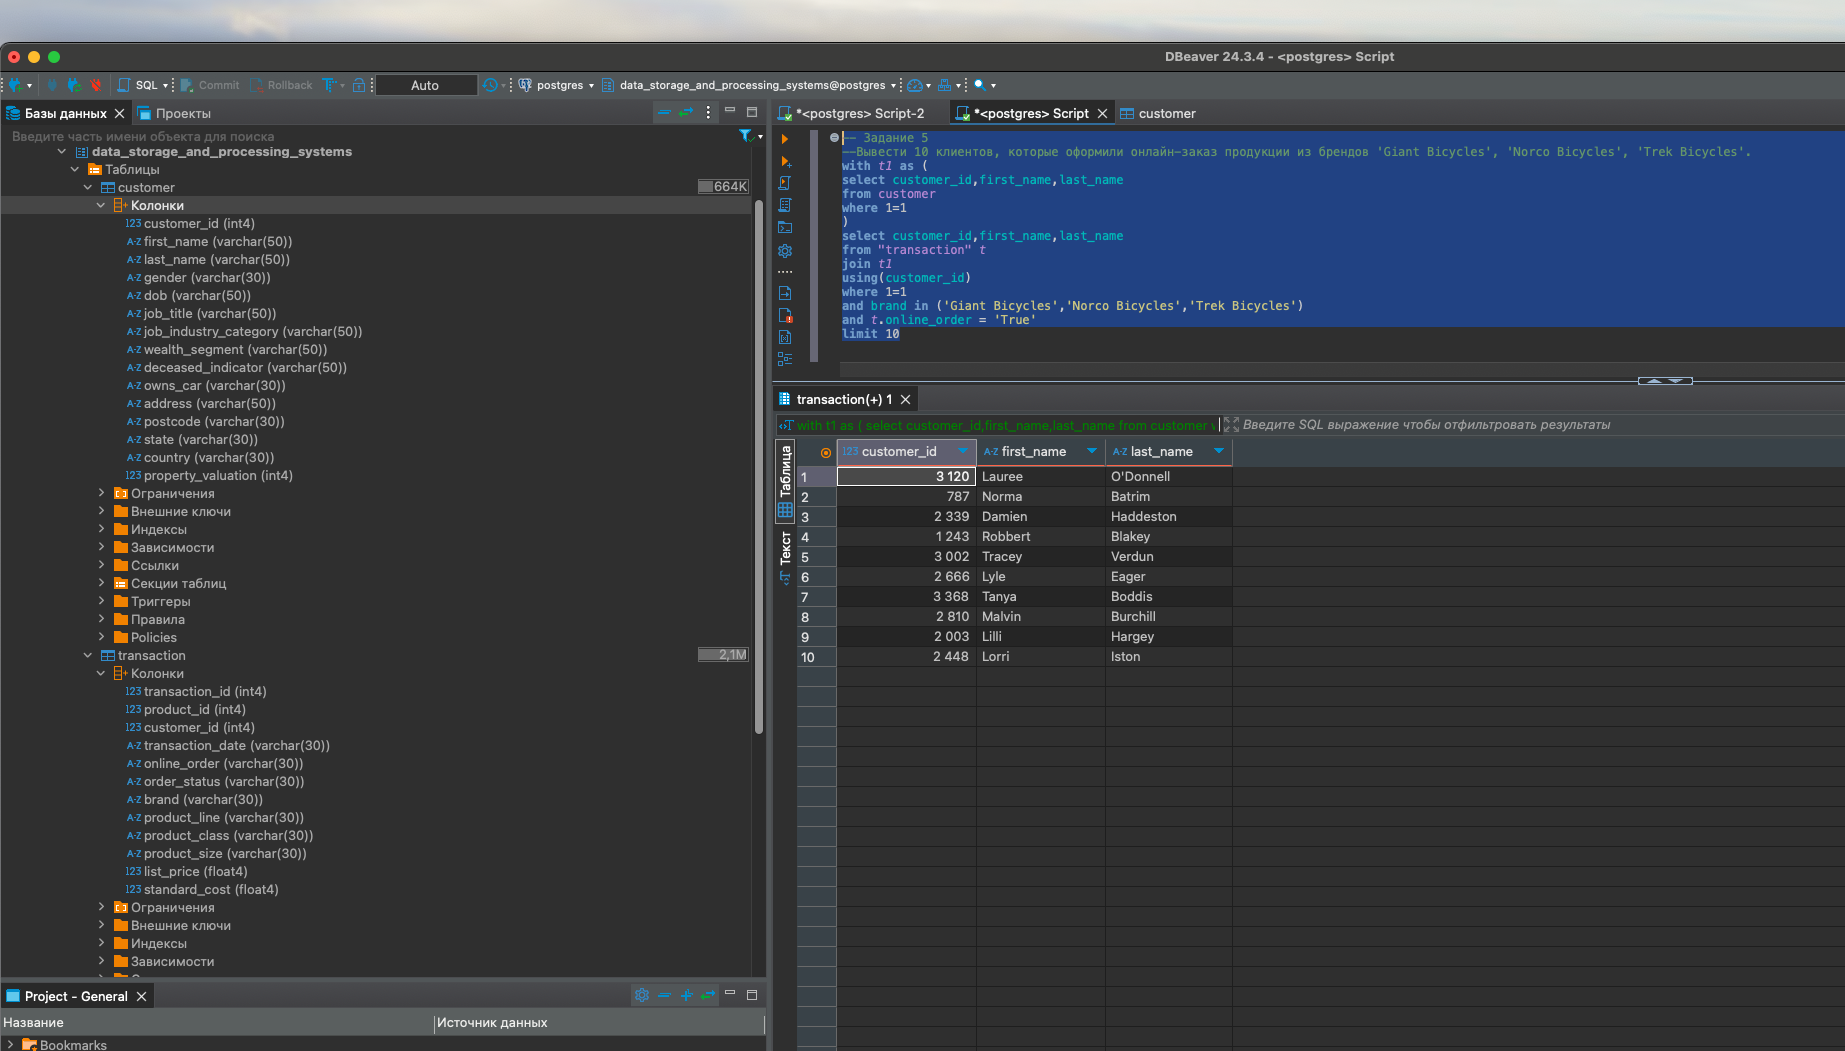

-- Задание 6
--Вывести всех клиентов, у которых нет транзакций.
with t1 as (
select distinct customer_id
from "transaction"
where 1=1
)
select customer_id,first_name,last_name
from customer
left join t1
using(customer_id)
where 1=1
and t1.customer_id is null

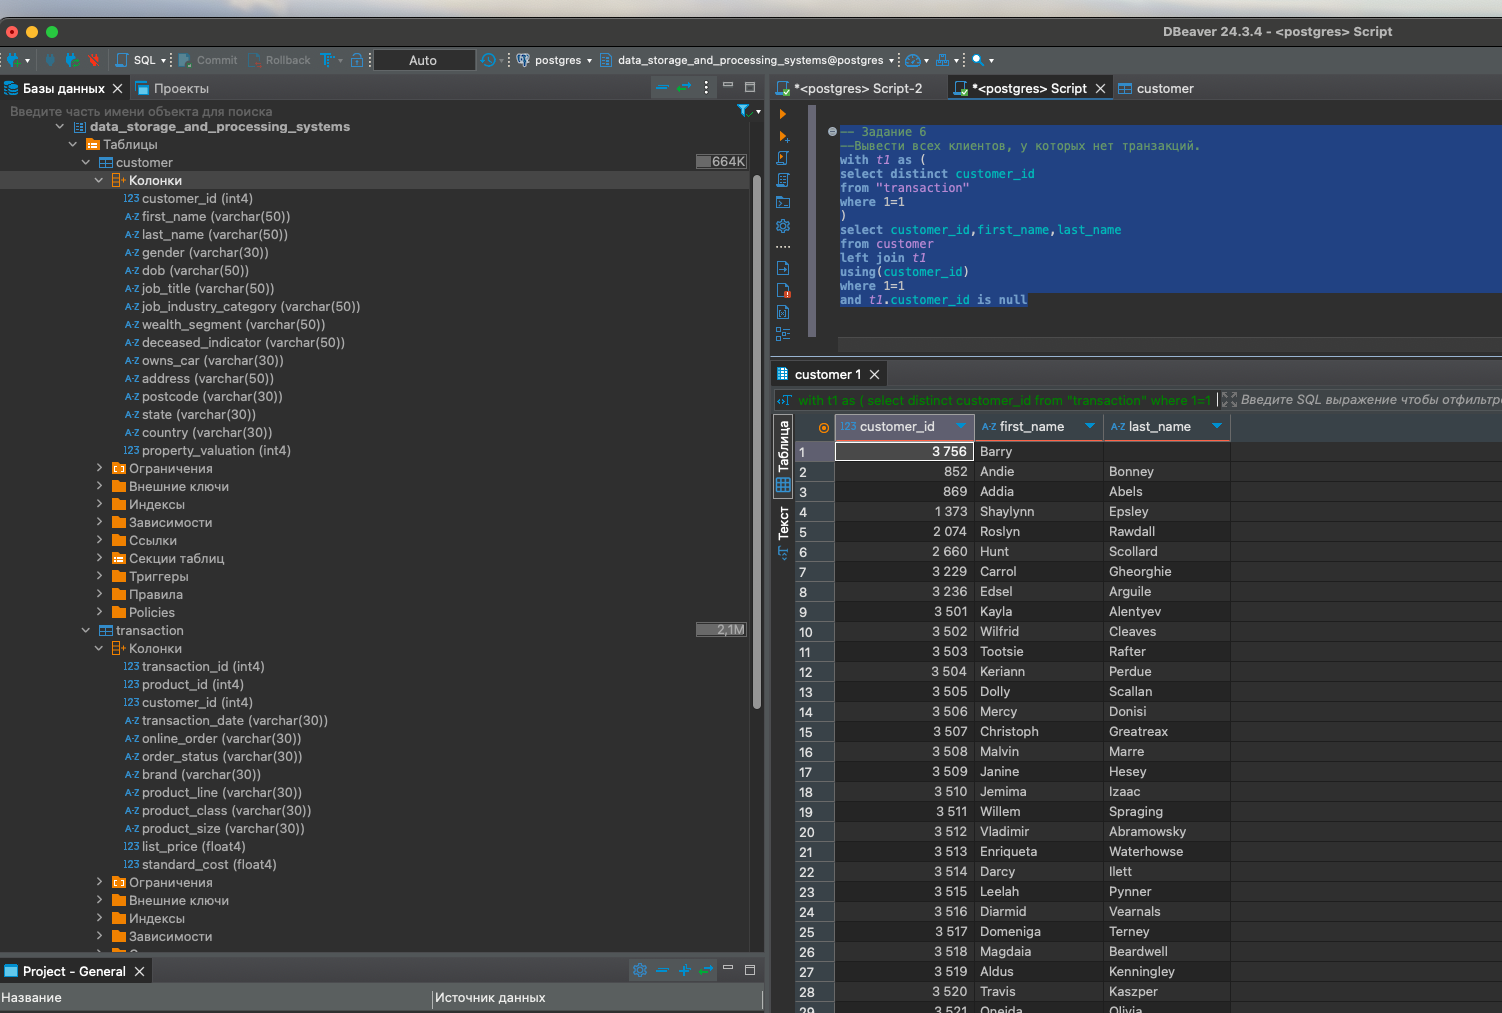

-- Задание 7
--Вывести всех клиентов из IT, у которых транзакции с максимальной стандартной стоимостью.
with t1 as (
select customer_id,first_name,last_name
from customer
where 1=1
and job_industry_category = 'IT'
),
t2 as (
select max(standard_cost) as mxt_cost
from "transaction"
where 1=1
)
select distinct customer_id,first_name,last_name
from "transaction"
join t1
using(customer_id)
join t2
on mxt_cost = "transaction".standard_cost 
where 1=1

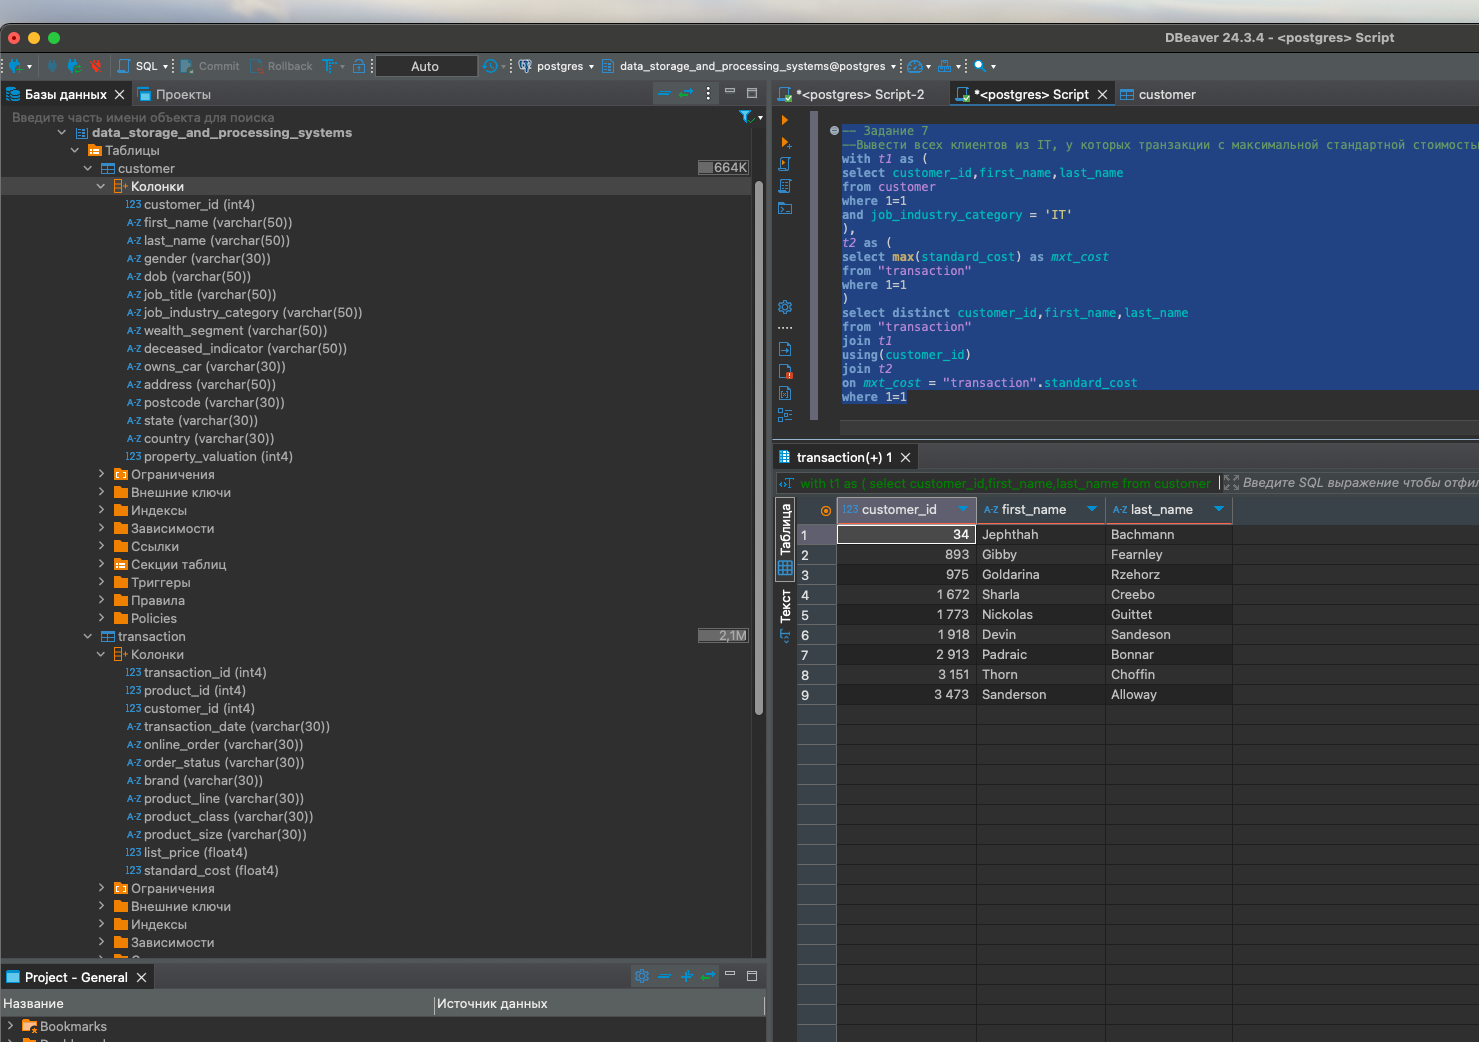

-- Задание 8
--Вывести всех клиентов из сферы IT и Health, у которых есть подтвержденные транзакции за период '2017-07-07' по '2017-07-17'.
with t1 as (
select customer_id,first_name,last_name
from customer
where 1=1
and job_industry_category in ('IT','Health')
)
select distinct customer_id,first_name,last_name
from "transaction" as t
join t1
using(customer_id)
where 1=1
and order_status = 'Approved'
and to_date(t.transaction_date, 'DD.MM.YYYY') between '2017-07-07' and '2027-07-17'

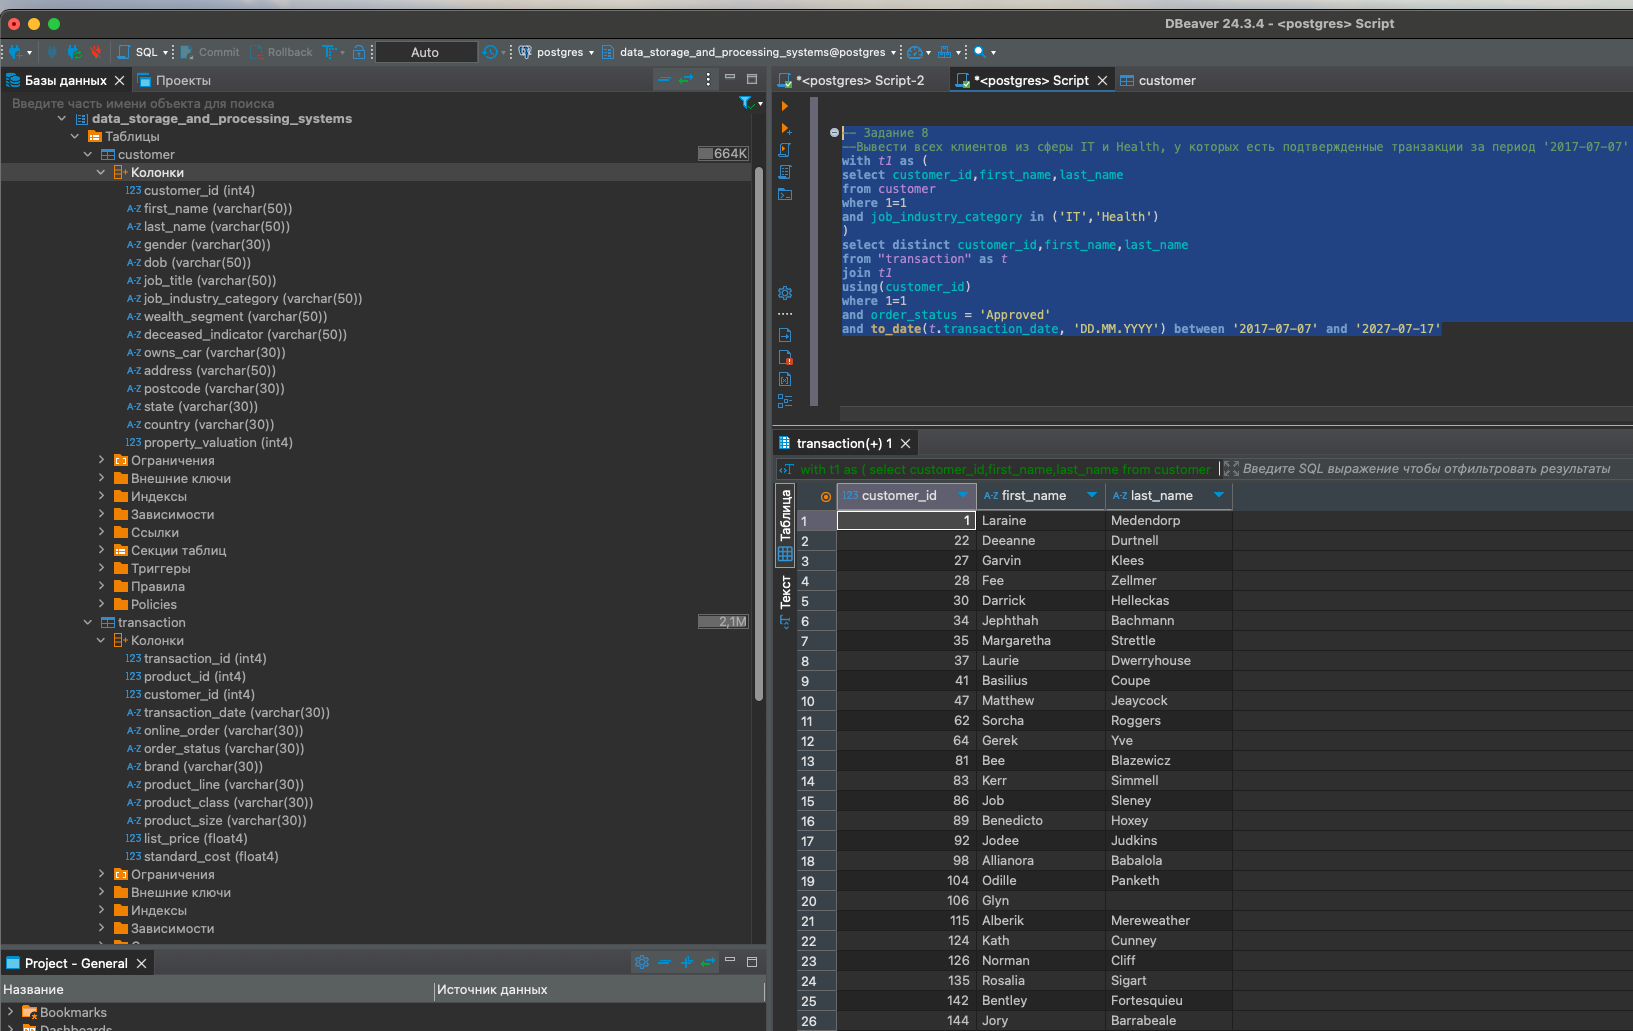